Name: Sudhina D

Batch: R3

Date: 06-03-2023

Experiment Name: Forecasting Stock market Price : Google Stock Price Data

RNN:

Recurrent neural networks (RNN) are a class of neural networks that is powerful for modeling sequence data such as time series or natural language. I have used it in predicting stock prices. The logic behind this is that it will remember the price after a particular sequence and the model will gain experience based on that pattern. Schematically, RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far. RNN can retain sequence patterns only for a short time thus, we move to LSTM that can remember patterns in Long and Short Term memory.

LSTM:

LSTM is an artificial recurrent neural network architecture used in the field of deep learning. It is preferred over feedforward neural networks because it can memorize the data points over a longer period and hence the name Long Short Term Memory. LSTM network consists of cell, input gate, output gate and a forget gate.
Cell is like a memory that holds values over arbitrary time and three gates regulate that information in and out of the cell.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
#Connecting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the training setpd

dataset_train = pd.read_csv("/content/drive/MyDrive/DNNSP LAB/Google_Stock_Price_Train[1].csv")
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 18s 142ms/step - loss: 0.0210
Epoch 2/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0028
Epoch 3/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0028
Epoch 4/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0023
Epoch 5/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0022
Epoch 6/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0026
Epoch 7/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0021
Epoch 8/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0019
Epoch 9/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0021
Epoch 10/100
38/38 [==============================] - 7s 190ms/step - loss: 0.0022
Epoch 11/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0019
Epoch 12/100
38/38 [==============================] - 7s 190ms/step - loss: 0.0018
Epoch 13/100

In [ ]:
#Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv("/content/drive/MyDrive/DNNSP LAB/Google_Stock_Price_Test[1].csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


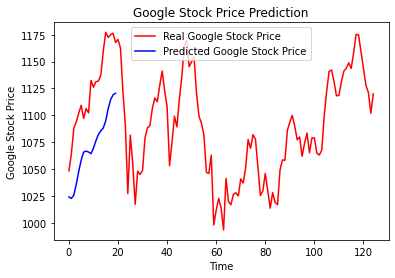

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()